In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram
 
import pandas as pd
import numpy as np

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)
 
%matplotlib inline

C:\Users\Faced\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Faced\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Faced\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Text(0, 0.5, 'Views')

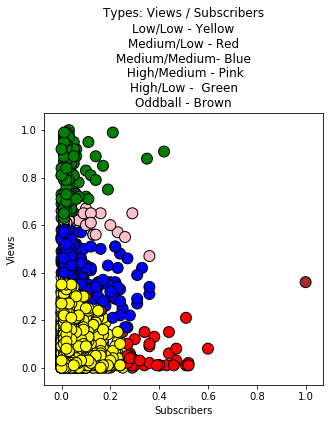

In [3]:
data = pd.read_csv('datayoutube.csv')
data.values
data

df = pd.DataFrame(data)
df.columns = ["Uploads","Subscribers","Views"]
df2=df[~df.Subscribers.str.contains("--")]
df3=df2[~df2.Uploads.str.contains("--")]

df = df3
df['Uploads'] = pd.to_numeric(df['Uploads'], errors='coerce')
df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')
df['Views'] = pd.to_numeric(df['Views'], errors='coerce')
df

df1 = df[~(df['Uploads'] >= 10000)]  
df=df1
df_norm = round((df - df.min())/
                          (df.max() - df.min()),2)
df=df_norm

centroid1 = np.array([0.1,0.1])
centroid2 = np.array([0.43, 0.1])
centroid3 = np.array([.3, .3])
centroid4 = np.array([.2,1])
centroid5 = np.array([.43,.6])
centroid6 = np.array([.9,.7])


df["Dist_C1"] = np.sqrt((df.Subscribers - centroid1[0])**2 
                             + (df.Uploads - centroid1[1])**2)
df["Dist_C2"] = np.sqrt((df.Subscribers - centroid2[0])**2 + 
                             (df.Uploads - centroid2[1])**2)
df["Dist_C3"] = np.sqrt((df.Subscribers - centroid3[0])**2 + 
                             (df.Uploads - centroid3[1])**2)
df["Dist_C4"] = np.sqrt((df.Subscribers - centroid4[0])**2 + 
                             (df.Uploads - centroid4[1])**2)
df["Dist_C5"] = np.sqrt((df.Subscribers - centroid5[0])**2 + 
                             (df.Uploads - centroid5[1])**2)
df["Dist_C6"] = np.sqrt((df.Subscribers - centroid6[0])**2 + 
                             (df.Uploads - centroid6[1])**2)
df

df["Association"] = np.where(
    (df.Dist_C1 < df.Dist_C2) & 
    (df.Dist_C1 < df.Dist_C3) &
    (df.Dist_C1 < df.Dist_C4) &
    (df.Dist_C1 < df.Dist_C5) &
    (df.Dist_C1 < df.Dist_C6), 1, 
     np.where((df.Dist_C2 < df.Dist_C1) & 
    (df.Dist_C2 < df.Dist_C3) &
    (df.Dist_C2 < df.Dist_C4) &
    (df.Dist_C2 < df.Dist_C5) &
    (df.Dist_C2 < df.Dist_C6), 2,
     np.where((df.Dist_C3 < df.Dist_C1) & 
    (df.Dist_C3 < df.Dist_C2) &
    (df.Dist_C3 < df.Dist_C4) &
    (df.Dist_C3 < df.Dist_C5) &
    (df.Dist_C3 < df.Dist_C6), 3,
     np.where((df.Dist_C4 < df.Dist_C1) & 
    (df.Dist_C4 < df.Dist_C2) &
    (df.Dist_C4 < df.Dist_C3) &
    (df.Dist_C4 < df.Dist_C5) &
    (df.Dist_C4 < df.Dist_C6), 4,
     np.where((df.Dist_C5 < df.Dist_C1) & 
    (df.Dist_C5 < df.Dist_C2) &
    (df.Dist_C5 < df.Dist_C3) &
    (df.Dist_C5 < df.Dist_C4) &
    (df.Dist_C5 < df.Dist_C6), 5,6)))))
df
fig = plt.figure(figsize=(5,5))


colormap = np.array(['black', 'yellow', 'red', 'blue', 'green','pink','brown'])
 
plt.scatter(df.Subscribers,df.Uploads, 
            c = colormap[df.Association], edgecolor = 'black', s = 120)
plt.title('Types: Views / Subscribers\nLow/Low - Yellow\nMedium/Low - Red\nMedium/Medium- Blue\n High/Medium - Pink\nHigh/Low -  Green\nOddball - Brown')
ax = fig.add_subplot(111)
ax.set_xlabel('Subscribers')
ax.set_ylabel('Views')